## Loading the ENSO and SAM index and identifiying the years which have a strong oscillation ##

We use 2 indices: the Southern Oscillation Index and Southern Annular Mode Index. 
The Southern Oscillation Index (SOI) is a standardized index based on the observed sea level pressure (SLP) differences between Tahiti and Darwin, Australia. The SOI is one measure of the large-scale fluctuations in air pressure occurring between the western and eastern tropical Pacific (i.e., the state of the Southern Oscillation) during El Niño and La Niña episodes. In general, smoothed time series of the SOI correspond very well with changes in ocean temperatures across the eastern tropical Pacific. The negative phase of the SOI represents below-normal air pressure at Tahiti and above-normal air pressure at Darwin. Prolonged periods of negative (positive) SOI values coincide with abnormally warm (cold) ocean waters across the eastern tropical Pacific typical of El Niño (La Niña) episodes. 

The station-based index of the Southern Annular Mode (SAM) is based on the zonal pressure difference between the latitudes of 40S and 65S.  As such, the SAM index measures a "see-saw" of atmospheric mass between the middle and high latitudes of the Southern Hemisphere.  Positive values of the SAM index correspond with stronger-than-average westerlies over the mid-high latitudes (50S-70S) and weaker westerlies in the mid-latitudes (30S-50S).

In [1]:
#importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

/tmp/ipykernel_17636/3752702245.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  soi['date'] = pd.to_datetime(soi['date'])
/tmp/ipykernel_17636/3752702245.py:36: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  sam['date'] = pd.to_datetime(sam['date'])
/tmp/ipykernel_17636/3752702245.py:63: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  iod['date'] = pd.to_datetime(iod['date'])


El Niño years: [1991 1992 1993 1997 1998 2009 2010]
La Niña years: [1996 1998 1999 2000 2001 2007 2008 2009 2010 2011 2012]
psam years: [1993 1998 1999 2000 2001 2002 2018 2019]
nsam years: [2016 2017]
Fig. 3, Monthly ENSO (black line) and SAM (red line) index from 1990 to 2020. 
 The Blue line represents the threshold value used to select the strong ENSO and SAM years


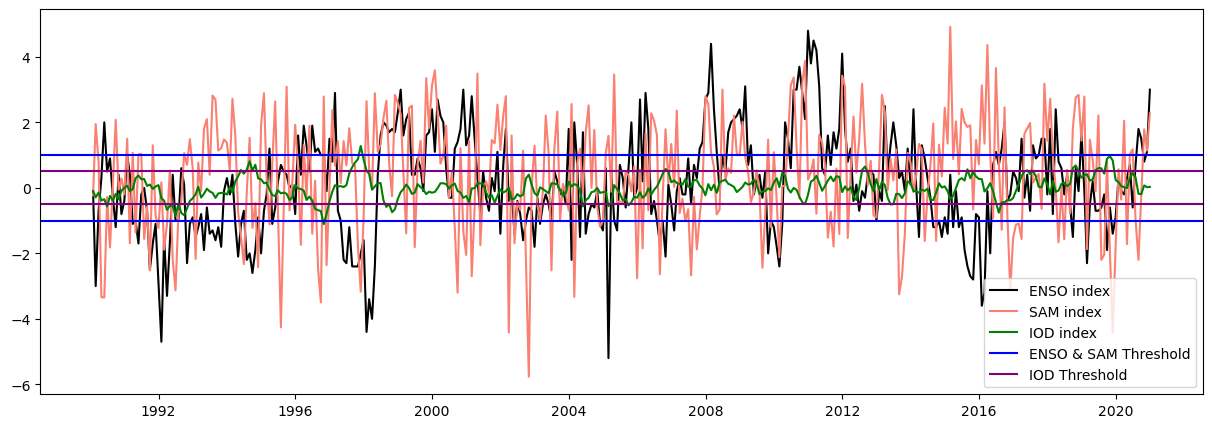

In [6]:

## Opening sam and SAM index datasets and finding the strong Elnino, Lanina, +SAM and -SAM years
soi = pd.read_csv('/home/jovyan/ohw23_proj_SAupwelling/Datasets/SOI_index.csv')

# # Convert the date column to datetime type
soi['date'] = pd.to_datetime(soi['date'])

soi
# # Create a new column to identify El Niño and La Niña years
soi['ENSO'] = None

# Iterate over the rows to determine El Niño and La Niña years
for i in range(len(soi)):
    enso_index = soi.loc[i, 'soi_index']
    
    if enso_index <= -1:
        # Check if there are more than 5 consecutive months with ENSO index less than -0.5
        if i <= len(soi) - 5 and all(soi.loc[i+j, 'soi_index'] <= -1 for j in range(5)):
            soi.loc[i:i+4, 'ENSO'] = 'El Niño'
    
    elif enso_index >= 1:
        # Check if there are more than 5 consecutive months with ENSO index greater than 0.5
        if i <= len(soi) - 5 and all(soi.loc[i+j, 'soi_index'] >= 1 for j in range(5)):
            soi.loc[i:i+4, 'ENSO'] = 'La Niña'

# Filter the data to only include El Niño and La Niña years
elnino_years = soi[soi['ENSO'] == 'El Niño']['date'].dt.year.unique()
lanina_years = soi[soi['ENSO'] == 'La Niña']['date'].dt.year.unique()

print('El Niño years:', elnino_years)
print('La Niña years:', lanina_years)

# Read the CSV file
sam = pd.read_csv('/home/jovyan/ohw23_proj_SAupwelling/Datasets/SAM_index.csv')

# Convert the date column to datetime type
sam['date'] = pd.to_datetime(sam['date'])

# Create a new column to identify El Niño and La Niña years
sam['SAM'] = None

# Iterate over the rows to determine El Niño and La Niña years
for i in range(len(sam)):
    sam_index = sam.loc[i, 'sam_index']
    
    if sam_index <= -1:
        # Check if there are more than 5 consecutive months with ENSO index less than -0.5
        if i <= len(sam) - 5 and all(sam.loc[i+j, 'sam_index'] <= -1 for j in range(5)):
            sam.loc[i:i+4, 'SAM'] = 'nsam'
    
    elif sam_index >= 1:
        # Check if there are more than 5 consecutive months with ENSO index greater than 0.5
        if i <= len(sam) - 5 and all(sam.loc[i+j, 'sam_index'] >= 1 for j in range(5)):
            sam.loc[i:i+4, 'SAM'] = 'psam'

# Filter the data to only include El Niño and La Niña years
psam_years = sam[sam['SAM'] == 'psam']['date'].dt.year.unique()
nsam_years = sam[sam['SAM'] == 'nsam']['date'].dt.year.unique()

print('psam years:', psam_years)
print('nsam years:', nsam_years)

iod = pd.read_csv('/home/jovyan/ohw23_proj_SAupwelling/Datasets/iod_index.csv')
iod['date'] = pd.to_datetime(iod['date'])
iod['IOD'] = None

#taking the year mean

fig,ax = plt.subplots(figsize=(15,5))
ax.plot(soi['date'],soi['soi_index'],color='k',label='ENSO index')
ax.plot(sam['date'],sam['sam_index'],color='salmon',label='SAM index')
ax.plot(iod['date'],iod['iod_index'],color='g',label='IOD index')
ax.axhline(y=1, color='blue',label='ENSO & SAM Threshold')
ax.axhline(y=0.5, color='purple',label='IOD Threshold')
ax.axhline(y=-0.5, color='purple')
ax.axhline(y=-1, color='blue')
ax.legend()


print('Fig. 3, Monthly ENSO (black line) and SAM (red line) index from 1990 to 2020. \n The Blue line represents the threshold value used to select the strong ENSO and SAM years')

# Specify the folder path
output_folder = '/home/jovyan/ohw23_proj_SAupwelling/Figures/'

# Save the figure to the specified folder
fig.savefig(os.path.join(output_folder, 'climate_mode_indexes_monthly.png'), dpi=300, bbox_inches='tight')


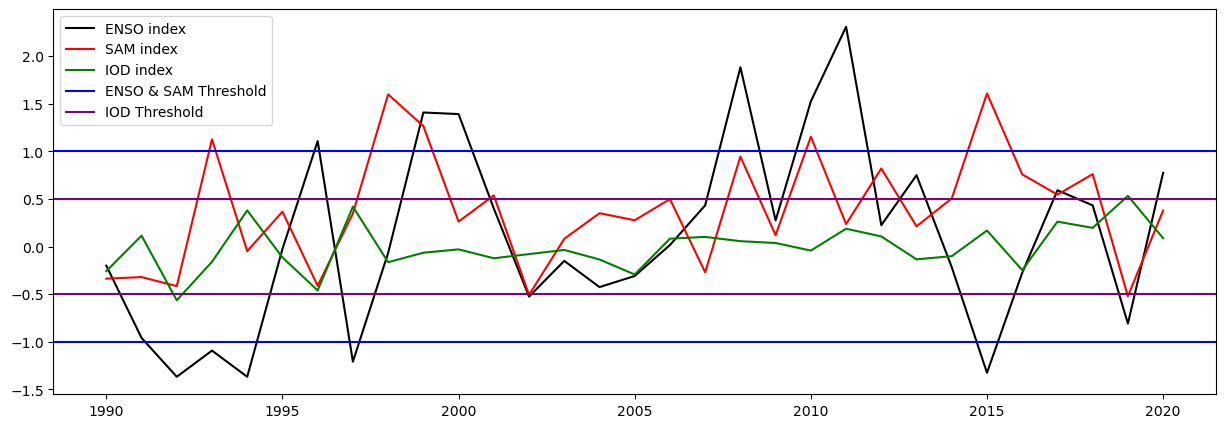

In [8]:
#lets take the year mean and plot it 
soi['year'] = soi['date'].dt.year
sam['year'] = sam['date'].dt.year
iod['year'] = iod['date'].dt.year
soi_yr = soi.groupby('year')['soi_index'].mean()
sam_yr = sam.groupby('year')['sam_index'].mean()
iod_yr = iod.groupby('year')['iod_index'].mean()
soi_yr = soi_yr.to_frame()
sam_yr = sam_yr.to_frame()
iod_yr = iod_yr.to_frame()
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(soi_yr['soi_index'],color='k',label='ENSO index')
ax.plot(sam_yr['sam_index'],color='r',label='SAM index')
ax.plot(iod_yr['iod_index'],color='g',label='IOD index')
ax.axhline(y=1, color='blue',label='ENSO & SAM Threshold')
ax.axhline(y=0.5, color='purple',label='IOD Threshold')
ax.axhline(y=-1, color='blue')
ax.axhline(y=-0.5, color='purple')
ax.legend()

# Specify the folder path
output_folder = '/home/jovyan/ohw23_proj_SAupwelling/Figures/'

# Save the figure to the specified folder
fig.savefig(os.path.join(output_folder, 'climate_mode_indexes_annually.png'), dpi=300, bbox_inches='tight')
